<a href="https://colab.research.google.com/github/fmahboub/Health_Club_Revenue_Maximization/blob/master/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy
import pandas as pd
from sklearn import preprocessing
import sklearn
import numpy as np
from google.colab import files

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# load survey dataset
file1 = pd.read_excel('drive/My Drive/MMA/RSM 8423 Optimizing Supply Chain Management'+
                     ' and Logistics/Individual Assignment 4: New York Health Club/RawData.xlsx')

# Set price ranges for regression
p0 = list(range(0,151))
p59 = list(range(0,151))
# Empty dataframe to fill
train = pd.DataFrame(columns = ['P0','P59','5-9','Not5-9','Neither','Total'])

for price0 in p0:
  for price59 in p59:
    print ('Price0:',price0)
    print ('Price5-9',price59)
    # ________Demand Calculation________
    # Create Max Wtp not 5-9
    data = file1.copy()
    data['Max wtp not5-9'] = data.drop(columns=['5pm_9pm','Client','Type']).max(axis=1)
    # Prices which are updated on each loop iteration
    data['P0'] = price0
    data['P59'] = price59
    # Create Max(netUtil N59,0)
    data['NetUtil Not59'] = data['Max wtp not5-9'] - data['P0']
    data['Max(netUtil N59,0)'] = data['Max wtp not5-9'] - data['P0']
    data.loc[data['Max(netUtil N59,0)'] < 0, 'Max(netUtil N59,0)'] = 0
    # Create Choice Column (Assumption to choose 5-9 if utilities are tied, & choose to buy if utility is 0)
    data.loc[(data['5pm_9pm'] - data['P59']) >= data['Max(netUtil N59,0)'], 'Choice'] = '5-9'
    data.loc[((data['5pm_9pm'] - data['P59']) < data['Max(netUtil N59,0)']) &
             (data['NetUtil Not59'] >= 0), 'Choice'] = 'Not5-9'
    data.loc[data['Choice'].isna() == True, 'Choice'] = 'Neither'
    # Count choice types
    temp = data['Choice'].value_counts().to_frame().transpose().reset_index(drop=True)
    temp[['P0','P59']] = data[['P0','P59']]
    if 'Neither' not in temp.columns:
      temp['Neither'] = 0
    if '5-9' not in temp.columns:
      temp['5-9'] = 0
    if 'Not5-9' not in temp.columns:
      temp['Not5-9'] = 0
    temp = temp[['P0','P59','5-9','Not5-9','Neither']]
    temp['Total'] = temp['5-9']+temp['Not5-9']+temp['Neither']
    train = train.append(temp)

In [0]:
train = train.rename(columns={'5-9':'D59', 'Not5-9':'D0'})
train

,Unnamed: 0,P0,P59,D59,D0,Neither,Total
0,0,0,0,227,773,0,1000
1,0,0,1,217,783,0,1000
2,0,0,2,210,790,0,1000
3,0,0,3,206,794,0,1000
4,0,0,4,201,799,0,1000
...,...,...,...,...,...,...,...
22796,0,150,146,23,51,926,1000
22797,0,150,147,21,51,928,1000
22798,0,150,148,21,51,928,1000
22799,0,150,149,19,51,930,1000


In [0]:
train.to_excel('train.xlsx')
files.download('train.xlsx')

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
from sklearn import linear_model
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [0]:
x = train[['P0','P59']]
x = sm.add_constant(x)
y = train[['D59']]
model1 = sm.OLS(y.astype(float), x.astype(float)).fit()
model1.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    D59   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                 6.325e+04
Date:                Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                        22:06:06   Log-Likelihood:            -1.3929e+05
No. Observations:               22801   AIC:                         2.786e+05
Df Residuals:                   22798   BIC:                         2.786e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        413.7949      1.896    218.195      0.000     410.078     417.512
P0             3.0000      0.017    181.405      0.000       2.968       3.032
P59           -5.0593      0.017   -305.925      0.000      -5.092      -5.027
==============================================================================
Omnibus:                     1519.088   Durbin-Watson:                   0.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1765.528
Skew:                           0.665   Prob(JB):                         0.00
Kurtosis:                       2.705   Cond. No.                         302.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

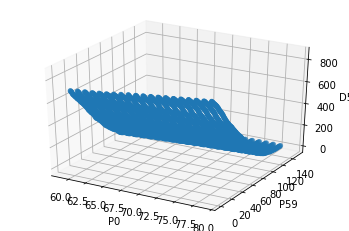

In [0]:
X = train[['P0','P59']].iloc[9000:12000,:]
z = y.iloc[9000:12000,:]
threedee = plt.figure().gca(projection='3d')
threedee.scatter(X['P0'], X['P59'], z)
threedee.set_xlabel('P0')
threedee.set_ylabel('P59')
threedee.set_zlabel('D59')
plt.show()

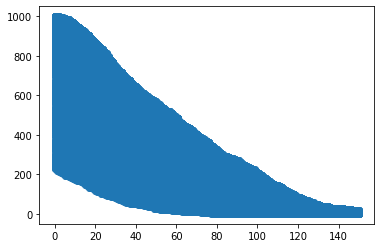

In [0]:
plt.scatter(train['P59'],train['D59'])

In [0]:
x = train[['P0','P59']]
x = sm.add_constant(x)
y = train[['D0']]
model2 = sm.OLS(y.astype(float), x.astype(float)).fit()
model2.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     D0   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 1.579e+05
Date:                Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                        22:06:23   Log-Likelihood:            -1.3606e+05
No. Observations:               22801   AIC:                         2.721e+05
Df Residuals:                   22798   BIC:                         2.721e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        914.7323      1.646    555.715      0.000     911.506     917.959
P0            -7.6602      0.014   -533.652      0.000      -7.688      -7.632
P59            2.5241      0.014    175.847      0.000       2.496       2.552
==============================================================================
Omnibus:                      755.325   Durbin-Watson:                   0.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              403.525
Skew:                           0.146   Prob(JB):                     2.38e-88
Kurtosis:                       2.418   Cond. No.                         302.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
# Load train from saved file
file1 = pd.read_excel('drive/My Drive/MMA/RSM 8423 Optimizing Supply Chain Management'+
                     ' and Logistics/Individual Assignment 4: New York Health Club/RawData.xlsx')
train = pd.read_excel('drive/My Drive/MMA/RSM 8423 Optimizing Supply Chain Management'+
                     ' and Logistics/Individual Assignment 4: New York Health Club/train.xlsx')

In [0]:
# Correlation Coefficient
p0 = list(range(0,151))
p59 = list(range(0,151))
table = pd.DataFrame(columns = ['P0','P59','5-9','Not5-9','Neither','Total'])
for price0 in p0:
  # ________Demand Calculation________
  # Create Max Wtp not 5-9
  data = file1.copy()
  data['Max wtp not5-9'] = data.drop(columns=['5pm_9pm','Client','Type']).max(axis=1)
  # Prices which are updated on each loop iteration
  data['P0'] = price0
  data['P59'] = 80
  # Create Max(netUtil N59,0)
  data['NetUtil Not59'] = data['Max wtp not5-9'] - data['P0']
  data['Max(netUtil N59,0)'] = data['Max wtp not5-9'] - data['P0']
  data.loc[data['Max(netUtil N59,0)'] < 0, 'Max(netUtil N59,0)'] = 0
  # Create Choice Column (Assumption to choose 5-9 if utilities are tied, & choose to buy if utility is 0)
  data.loc[(data['5pm_9pm'] - data['P59']) >= data['Max(netUtil N59,0)'], 'Choice'] = '5-9'
  data.loc[((data['5pm_9pm'] - data['P59']) < data['Max(netUtil N59,0)']) &
            (data['NetUtil Not59'] >= 0), 'Choice'] = 'Not5-9'
  data.loc[data['Choice'].isna() == True, 'Choice'] = 'Neither'
  # Count choice types
  temp = data['Choice'].value_counts().to_frame().transpose().reset_index(drop=True)
  temp[['P0','P59']] = data[['P0','P59']]
  if 'Neither' not in temp.columns:
    temp['Neither'] = 0
  if '5-9' not in temp.columns:
    temp['5-9'] = 0
  if 'Not5-9' not in temp.columns:
    temp['Not5-9'] = 0
  temp = temp[['P0','P59','5-9','Not5-9','Neither']]
  temp['Total'] = temp['5-9']+temp['Not5-9']+temp['Neither']
  table = table.append(temp)
table = table.rename(columns={'5-9':'D59', 'Not5-9':'D0'})
table

,P0,P59,D59,D0,Neither,Total
0,0,80,0,1000,0,1000
0,1,80,0,1000,0,1000
0,2,80,2,998,0,1000
0,3,80,2,998,0,1000
0,4,80,4,996,0,1000
...,...,...,...,...,...,...
0,146,80,325,33,642,1000
0,147,80,326,32,642,1000
0,148,80,326,32,642,1000
0,149,80,327,31,642,1000


In [0]:
table.drop(columns=['P59','Total']).astype(float).corr(method='pearson')

,P0,D59,D0,Neither
P0,1.000000,0.985528,-0.972538,0.955890
D59,0.985528,1.000000,-0.984968,0.967204
D0,-0.972538,-0.984968,1.000000,-0.996540
Neither,0.955890,0.967204,-0.996540,1.000000


In [0]:
# Revenue Optimization Discrete
p0 = list(range(0,151))
p59 = list(range(0,151))
table = pd.DataFrame(columns = ['P0','P59','5-9','Not5-9','Neither','Total', 'Rev59','RevNot59','Total Rev'])
for price59 in p59:
  # ________Demand Calculation________
  # Create Max Wtp not 5-9
  data = file1.copy()
  data['Max wtp not5-9'] = data.drop(columns=['5pm_9pm','Client','Type']).max(axis=1)
  # Prices which are updated on each loop iteration
  data['P0'] = 65
  data['P59'] = price59
  # Create Max(netUtil N59,0)
  data['NetUtil Not59'] = data['Max wtp not5-9'] - data['P0']
  data['Max(netUtil N59,0)'] = data['Max wtp not5-9'] - data['P0']
  data.loc[data['Max(netUtil N59,0)'] < 0, 'Max(netUtil N59,0)'] = 0
  # Create Choice Column (Assumption to choose 5-9 if utilities are tied, & choose to buy if utility is 0)
  data.loc[(data['5pm_9pm'] - data['P59']) >= data['Max(netUtil N59,0)'], 'Choice'] = '5-9'
  data.loc[((data['5pm_9pm'] - data['P59']) < data['Max(netUtil N59,0)']) &
            (data['NetUtil Not59'] >= 0), 'Choice'] = 'Not5-9'
  data.loc[data['Choice'].isna() == True, 'Choice'] = 'Neither'
  # Count choice types
  temp = data['Choice'].value_counts().to_frame().transpose().reset_index(drop=True)
  temp[['P0','P59']] = data[['P0','P59']]
  if 'Neither' not in temp.columns:
    temp['Neither'] = 0
  if '5-9' not in temp.columns:
    temp['5-9'] = 0
  if 'Not5-9' not in temp.columns:
    temp['Not5-9'] = 0
  temp = temp[['P0','P59','5-9','Not5-9','Neither']]
  temp['Total'] = temp['5-9']+temp['Not5-9']+temp['Neither']
  temp['Rev59'] = temp['5-9']*price59
  temp['RevNot59'] = temp['Not5-9']*65
  temp['Total Rev'] = temp['Rev59'] + temp['RevNot59']
  table = table.append(temp)
table = table.rename(columns={'5-9':'D59', 'Not5-9':'D0'})
opt = table.loc[table['Total Rev'] == table['Total Rev'].max(axis=0)]
opt

,P0,P59,D59,D0,Neither,Total,Rev59,RevNot59,Total Rev
0,65,83,123,801,76,1000,10209,52065,62274


In [103]:
# 1D Revenue Optimization Continuous (p0 fixed to $65)
price0 = 65
from scipy import optimize
def f(price59):
    return -1*((413.7949 + 3*price0 - 5.0593*price59)*price59 + price0*(914.7323 - 7.6602*price0 + 2.5241*price59))
result = optimize.minimize_scalar(f)
print("p59: $"+str(round(result.x,2)))

p59: $76.38


In [98]:
# 2D Revenue Optimization Continuous
import scipy.optimize as optimize

def f(params):
    # print(params)  # <-- you'll see that params is a NumPy array
    price0, price59 = params # <-- for readability you may wish to assign names to the component variables
    return -1*((413.7949 + 3*price0 - 5.0593*price59)*price59 + price0*(914.7323 - 7.6602*price0 + 2.5241*price59))

initial_guess = [0, 0]
result = optimize.minimize(f, initial_guess)
if result.success:
    fitted_params = result.x
    print('p0: $'+str(round(fitted_params[0],2)))
    print('p59: $'+str(round(fitted_params[1],2)))
    print ('Optimal Revenue: $'+str(round((413.7949 + 3*fitted_params[0] - 5.0593*fitted_params[1])*fitted_params[1]
                                  + fitted_params[0]*(914.7323 - 7.6602*fitted_params[0] + 2.5241*fitted_params[1]),2)))
else:
    raise ValueError(result.message)

p0: $92.7
p59: $91.5
Optimal Revenue: $61329.57
